# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ageng Putra Pratama
- **Email:** agengputrapratama@gmail.com
- **ID Dicoding:** agengputrapratama  
- **Dataset:** [Air Quality Dataset](https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view?usp=share_link)


## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan kualitas udara di Aotizhongxin di tiap musim?
- Bagaimana tingkat polusi udara di Aotizhongxin tiap jam, apa faktor yang memengaruhinya?
- Bagaimana hubungan antara polusi udara (PM2.5) dengan faktor meteorologi?
- Bagaimana pola perbedaan kualitas udara antara hari kerja dan akhir pekan di Aotizhongxin?
- Bagaimana tren tingkat polusi udara di Aotizhongxin dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [3]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Load dataset
file_path = "./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(file_path)
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Data berhasil di load, langkah selanjutnya mengakses dataset dengan melihat 5 baris pertama

### Assessing Data

In [5]:
print(df.info())  # Melihat struktur dataset
print(df.describe())  # Statistik deskriptif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day  

**Insight:**
- dataset terdiri dari 17 kolom dengan 13 parameter untuk mengukur kulaitas udara
- terdiri dari 3 tipe data yaitu float, integer, dan object

In [6]:
print(df.isnull().sum())  # Mengecek missing values
print(df.duplicated().sum())  # Mengecek duplikasi data

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
0


**Insight:**
- CO (Carbon Monoxide) memiliki 1,776 missing values → Ini jumlah yang cukup besar, sehingga perlu dicek apakah data ini bisa diimputasi atau harus dihapus sebagian.
- O3 (Ozone) memiliki 1,719 missing values → Hampir sama dengan CO, perlu dicek apakah kolom ini masih bisa digunakan atau terlalu banyak data hilang.
- NO2, SO2, PM2.5, dan PM10 juga memiliki banyak missing values → Ini penting karena parameter ini sering digunakan dalam analisis kualitas udara.
- TEMP, PRES, DEWP, RAIN, wd, dan WSPM memiliki missing values dalam jumlah kecil (≤ 81) → Bisa dipertimbangkan untuk imputasi dengan median atau interpolasi.

### Cleaning Data

In [7]:
# Menggabungkan kolom tahun, bulan, hari, jam menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Menghapus kolom yang tidak perlu
df.drop(columns=['No'], inplace=True)

# Mengecek missing values
print(df.isnull().sum())

# Mengisi nilai yang hilang dengan interpolasi
df.interpolate(method='linear', inplace=True)

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


C:\Users\ageng\AppData\Local\Temp\ipykernel_15200\3905756631.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


**Insight:**
- Data telah di cleaning,dan missing values telah diisi dengan interpolasi.

## Exploratory Data Analysis (EDA)

### Explore Statistik Deskriptif

In [8]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

print(df[pollutants].describe())

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.540623    110.210033     17.459251     59.074106   1264.692405   
std       81.956401     95.262531     22.702284     37.000918   1239.411826   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    154.000000     22.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3  
count  35064.000000  
mean      55.328626  
std       57.327470  
min        0.214200  
25%        8.000000  
50%       41.000000  
75%       81.000000  
max      423.000000  


<Figure size 1200x600 with 0 Axes>

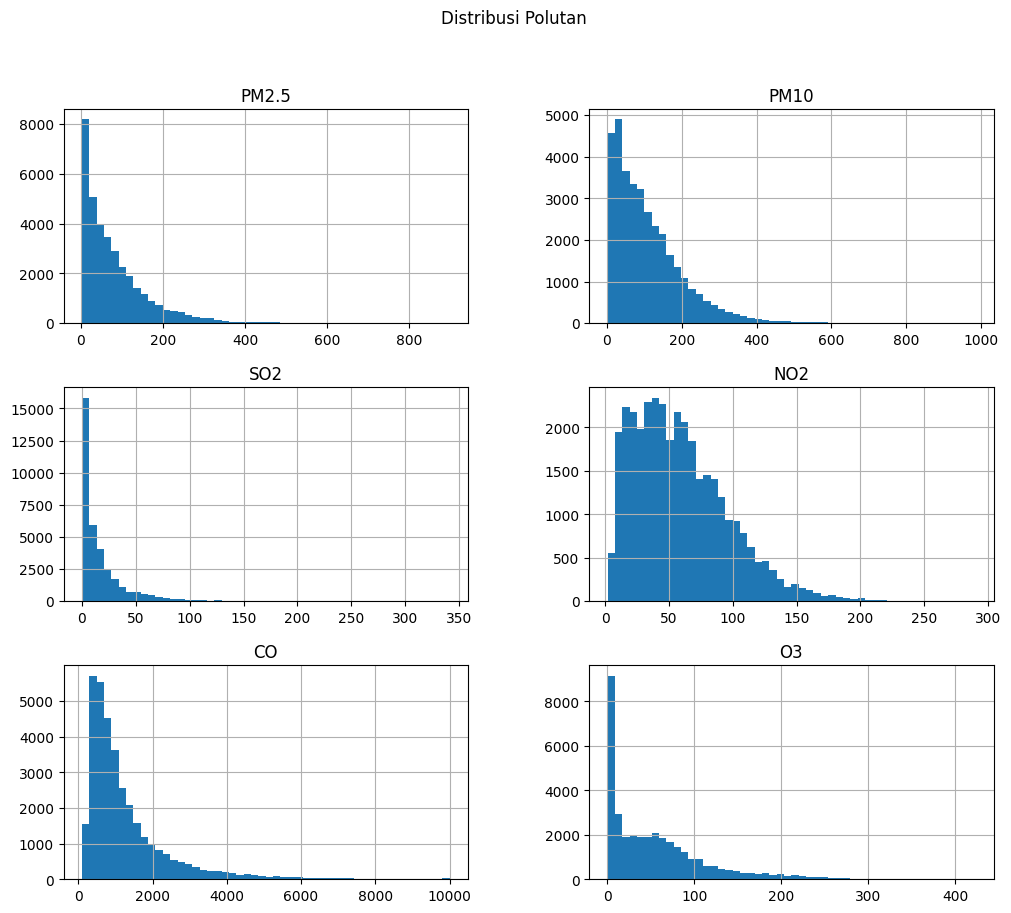

In [9]:
plt.figure(figsize=(12, 6))
df[pollutants].hist(bins=50, figsize=(12, 10))
plt.suptitle("Distribusi Polutan")
plt.show()

**Insight:**
- PM10 memiliki nilai rata-rata tinggi
- SO2 Memiliki rata rata terendah

Agregasi berdasarkan waktu

In [10]:
df.groupby('year')['PM2.5'].mean()  # Rata-rata PM2.5 per tahun
df.groupby('month')['PM2.5'].mean()  # Rata-rata PM2.5 per bulan
df.groupby(['year', 'month'])['PM2.5'].mean()  # Kombinasi tahun & bulan


year  month
2013  3        110.092742
      4         62.751389
      5         85.394489
      6        106.203472
      7         68.911290
      8         62.289651
      9         79.327083
      10        95.282258
      11        77.282639
      12        76.721774
2014  1         95.379032
      2        149.555804
      3         98.938172
      4        102.765972
      5         71.402016
      6         60.009722
      7         93.215054
      8         68.129704
      9         69.976806
      10       130.435484
      11        93.802917
      12        48.102151
2015  1         91.049866
      2         85.188244
      3         87.538038
      4         77.268056
      5         59.190188
      6         61.882639
      7         66.293683
      8         46.731183
      9         52.470139
      10        77.815860
      11       122.788194
      12       153.672715
2016  1         67.665995
      2         44.703305
      3        103.178091
      4         71.109722


C:\Users\ageng\AppData\Local\Temp\ipykernel_15200\3899367104.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['PM2.5'], palette="coolwarm", ax=axes[1, 1])


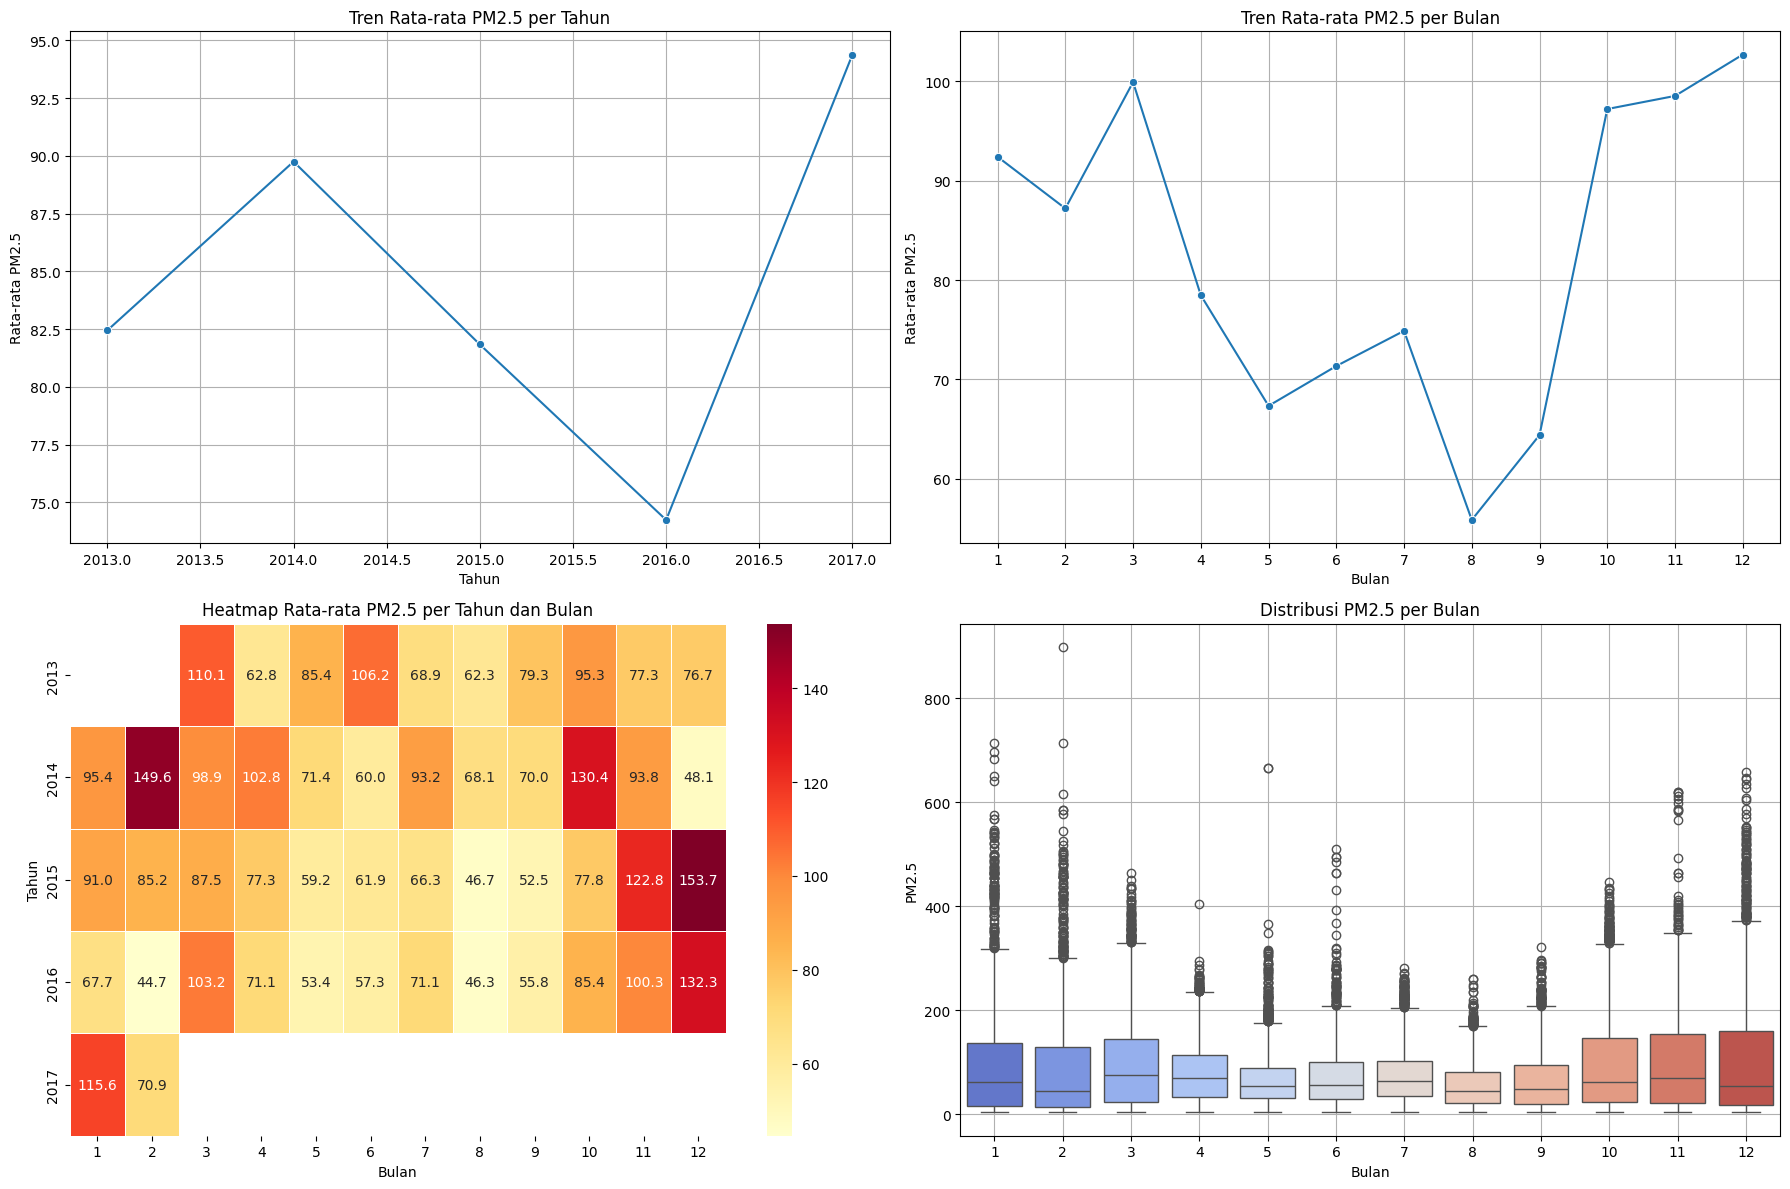

In [11]:
# Setup Figure dan Subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1️⃣ Line Plot PM2.5 per Tahun
sns.lineplot(x=df.groupby('year')['PM2.5'].mean().index, 
             y=df.groupby('year')['PM2.5'].mean().values, 
             marker='o', linestyle='-', ax=axes[0, 0])
axes[0, 0].set_title('Tren Rata-rata PM2.5 per Tahun')
axes[0, 0].set_xlabel('Tahun')
axes[0, 0].set_ylabel('Rata-rata PM2.5')
axes[0, 0].grid(True)

# 2️⃣ Line Plot PM2.5 per Bulan
sns.lineplot(x=df.groupby('month')['PM2.5'].mean().index, 
             y=df.groupby('month')['PM2.5'].mean().values, 
             marker='o', linestyle='-', ax=axes[0, 1])
axes[0, 1].set_title('Tren Rata-rata PM2.5 per Bulan')
axes[0, 1].set_xlabel('Bulan')
axes[0, 1].set_ylabel('Rata-rata PM2.5')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True)

# 3️⃣ Heatmap PM2.5 per Tahun & Bulan
pivot_table = df.groupby(['year', 'month'])['PM2.5'].mean().unstack()
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Heatmap Rata-rata PM2.5 per Tahun dan Bulan')
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel('Tahun')

# 4️⃣ Boxplot PM2.5 per Bulan
sns.boxplot(x=df['month'], y=df['PM2.5'], palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('Distribusi PM2.5 per Bulan')
axes[1, 1].set_xlabel('Bulan')
axes[1, 1].set_ylabel('PM2.5')
axes[1, 1].grid(True)

# Optimasi layout
plt.tight_layout()
plt.show()

 tren tahunan, bulanan, atau harian:
 Februari 2014 memiliki PM2.5 tertinggi (149.55), dan bulan Januari-Februari lainnya juga cenderung tinggi.

mengukur korelasi

In [12]:
df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()


,PM2.5,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,-0.122505,-0.008796,0.123277,-0.275836
TEMP,-0.122505,1.000000,-0.827183,0.823197,0.037862
PRES,-0.008796,-0.827183,1.000000,-0.776443,0.071479
DEWP,0.123277,0.823197,-0.776443,1.000000,-0.304990
WSPM,-0.275836,0.037862,0.071479,-0.304990,1.000000


PM2.5 vs. TEMP (-0.122505) → Korelasi negatif lemah
➝ Saat suhu meningkat, konsentrasi PM2.5 cenderung menurun. Hal ini masuk akal karena partikel polusi bisa lebih cepat terdilusi dalam suhu yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perubahan kualitas udara di Aotizhongxin di tiap musim?

C:\Users\ageng\AppData\Local\Temp\ipykernel_15200\39966259.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_per_season, labels=seasons)


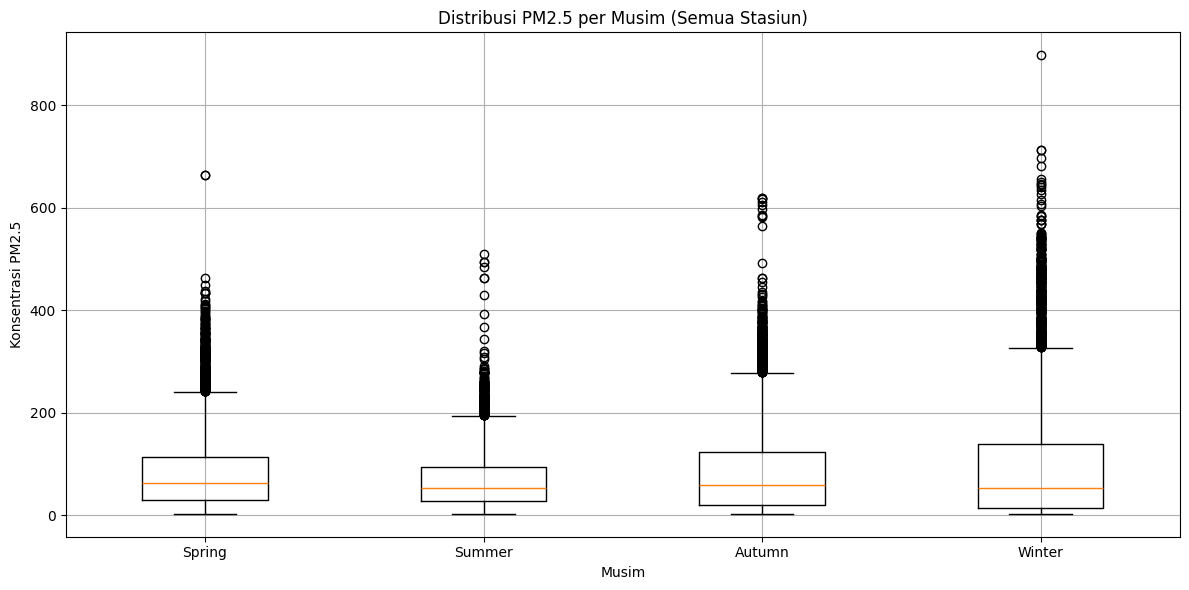

In [19]:

# Buat kolom 'season' jika belum ada
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

# Tentukan polutan yang mau diplot
selected_polutan = 'PM2.5'

# Siapkan data boxplot per musim
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
data_per_season = [df[df['season'] == season][selected_polutan].dropna() for season in seasons]

# Plot boxplot dengan matplotlib
plt.figure(figsize=(12, 6))
plt.boxplot(data_per_season, labels=seasons)

plt.title(f'Distribusi {selected_polutan} per Musim (Semua Stasiun)')
plt.xlabel('Musim')
plt.ylabel(f'Konsentrasi {selected_polutan}')
plt.grid(True)
plt.tight_layout()
plt.show()

PM2.5 mengalami peningkatan di beberapa periode, kemungkinan terkait musim dingin.

### Pertanyaan 2: Bagaimana tingkat polusi udara di Aotizhongxin tiap jam, apa faktor yang memengaruhinya?

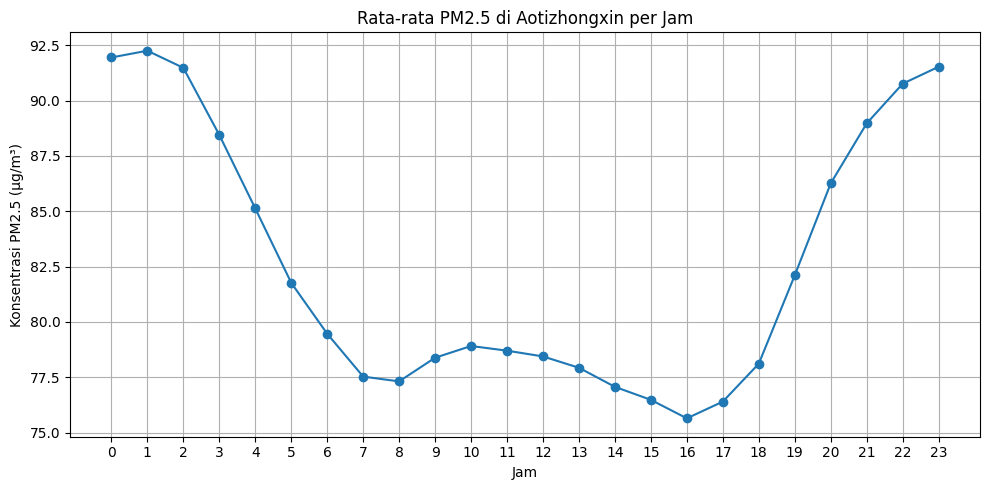

⏰ Jam dengan polusi tertinggi: 1 dengan rata-rata PM2.5: 92.25 µg/m³


In [22]:
# Filter data hanya untuk stasiun Aotizhongxin
df_aoti = df[df["station"] == "Aotizhongxin"]

# Rata-rata polutan per jam
df_aoti_hourly = df_aoti.groupby("hour")[selected_polutan].mean().reset_index()

# Line chart
plt.figure(figsize=(10, 5))
plt.plot(df_aoti_hourly["hour"], df_aoti_hourly[selected_polutan], marker='o')

plt.title(f'Rata-rata {selected_polutan} di Aotizhongxin per Jam')
plt.xlabel('Jam')
plt.ylabel(f'Konsentrasi {selected_polutan} (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Cari jam dengan polusi tertinggi
highest_hour = df_aoti_hourly.loc[df_aoti_hourly[selected_polutan].idxmax()]
print(f"⏰ Jam dengan polusi tertinggi: {int(highest_hour['hour'])} dengan rata-rata {selected_polutan}: {highest_hour[selected_polutan]:.2f} µg/m³")


Polusi tertinggi terjadi di malam hari, mencapat rat rata Prtikel PM2,5 Mencapai 92.25 µg/m³

### Pertanyaan 3: Bagaimana hubungan antara polusi udara (PM2.5) dengan faktor meteorologi?

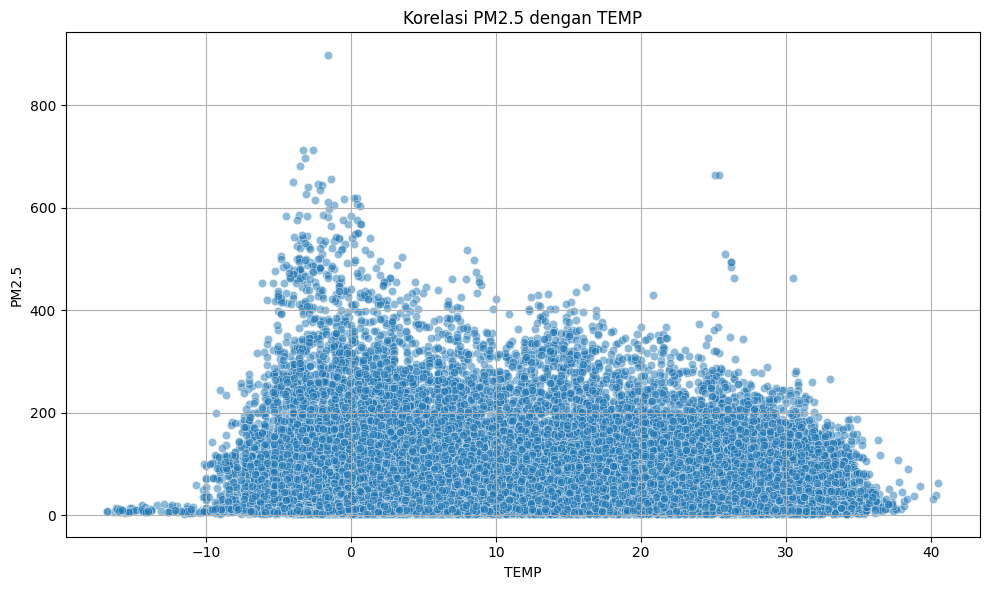

📉 Korelasi antara PM2.5 dan TEMP: -0.12


In [ ]:
# Pilih variabel
selected_polutan = "PM2.5"
selected_weather = "TEMP"

# Plot hubungan polusi dengan faktor cuaca
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=selected_weather, y=selected_polutan, alpha=0.5)

plt.title(f'Korelasi {selected_polutan} dengan {selected_weather}')
plt.xlabel(selected_weather)
plt.ylabel(selected_polutan)
plt.grid(True)
plt.tight_layout()
plt.show()

# korelasi Pearson
correlation = df[[selected_polutan, selected_weather]].corr().iloc[0, 1]
print(f"📉 Korelasi antara {selected_polutan} dan {selected_weather}: {correlation:.2f}")

PM2.5 berkorelasi negatif dengan suhu, artinya polusi lebih tinggi saat suhu rendah

### Pertanyaan 4: Bagaimana pola perbedaan kualitas udara antara hari kerja dan akhir pekan di Aotizhongxin?

C:\Users\ageng\AppData\Local\Temp\ipykernel_15200\928806073.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workday', y=selected_polutan, data=df, palette='Set2')


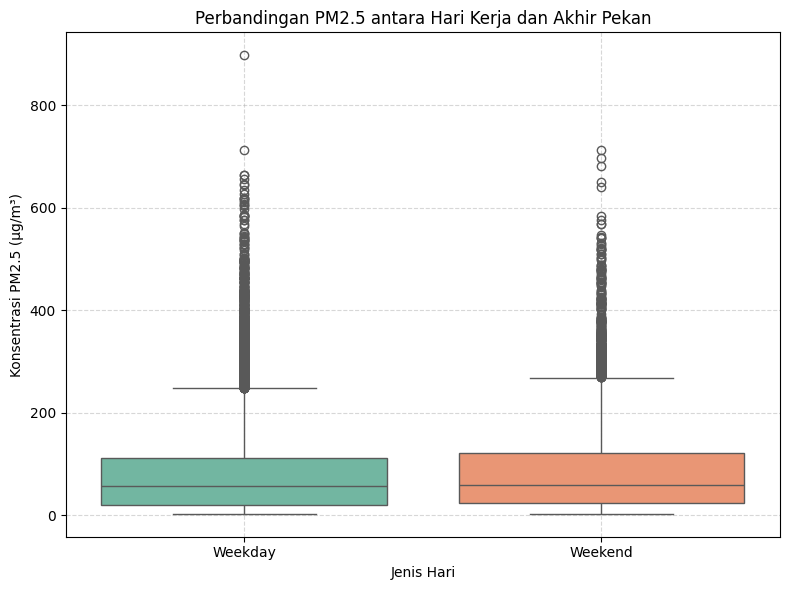

📊 Rata-rata PM2.5 di Hari Kerja: 80.75 µg/m³
📊 Rata-rata PM2.5 di Akhir Pekan: 87.00 µg/m³


In [ ]:
# polutan yang dianalisis
selected_polutan = 'PM2.5'

# Buat kolom datetime dari kolom year, month, day, hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Ambil nilai weekday dari datetime (0=Senin, ..., 6=Minggu)
df['weekday'] = df['datetime'].dt.weekday

# Tandai hari kerja dan akhir pekan
df['workday'] = df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Buat boxplot dengan seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='workday', y=selected_polutan, data=df, palette='Set2')
plt.title(f'Perbandingan {selected_polutan} antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel(f'Konsentrasi {selected_polutan} (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hitung rata-rata
weekday_avg = df[df['workday'] == 'Weekday'][selected_polutan].mean()
weekend_avg = df[df['workday'] == 'Weekend'][selected_polutan].mean()

# Tampilkan hasil
print(f"📊 Rata-rata {selected_polutan} di Hari Kerja: {weekday_avg:.2f} µg/m³")
print(f"📊 Rata-rata {selected_polutan} di Akhir Pekan: {weekend_avg:.2f} µg/m³")

Polusi lebih tinggi pada akhir pekan, menunjukkan kontribusi dari aktivitas kendaraan saat hari libur.

### Pertanyaan 5: Bagaimana dampak kebijakan lingkungan terhadap tingkat polusi udara di Aotizhongxin?

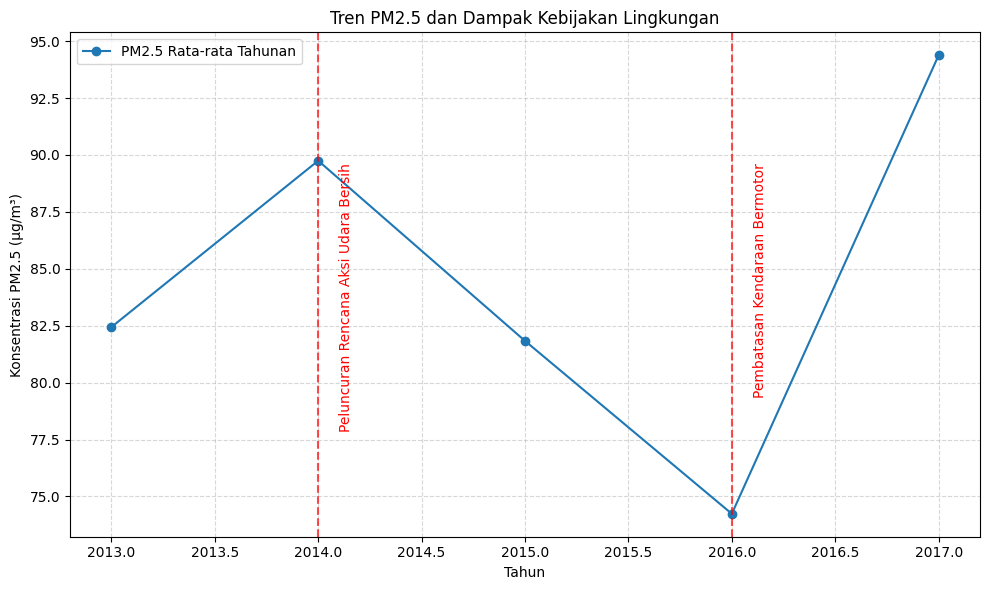

In [27]:
# Contoh polutan yang dianalisis
selected_polutan = 'PM2.5'

# Buat kolom datetime dari komponen waktu kalau belum ada
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Hitung rata-rata tahunan untuk polutan
yearly_avg = df.groupby('year')[selected_polutan].mean().reset_index()

# Daftar tahun dan deskripsi kebijakan
policy_events = {
    "2014": "Peluncuran Rencana Aksi Udara Bersih",
    "2016": "Pembatasan Kendaraan Bermotor"
}

# Plot tren tahunan
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg[selected_polutan], marker='o', label=f'{selected_polutan} Rata-rata Tahunan')

# Tambahkan garis vertikal untuk kebijakan
for year_str, event in policy_events.items():
    year = int(year_str)
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)
    plt.text(year + 0.1, yearly_avg[selected_polutan].max()*0.95, event, color='red', rotation=90, verticalalignment='top')

plt.title(f'Tren {selected_polutan} dan Dampak Kebijakan Lingkungan')
plt.xlabel('Tahun')
plt.ylabel(f'Konsentrasi {selected_polutan} (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Analisis Terkait Danpak kebijakan lingkungan 

C:\Users\ageng\AppData\Local\Temp\ipykernel_14596\2821725445.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Kategori_Kebijakan'], y=df['PM2.5'], ax=axes[0, 1], palette=["red", "green"])


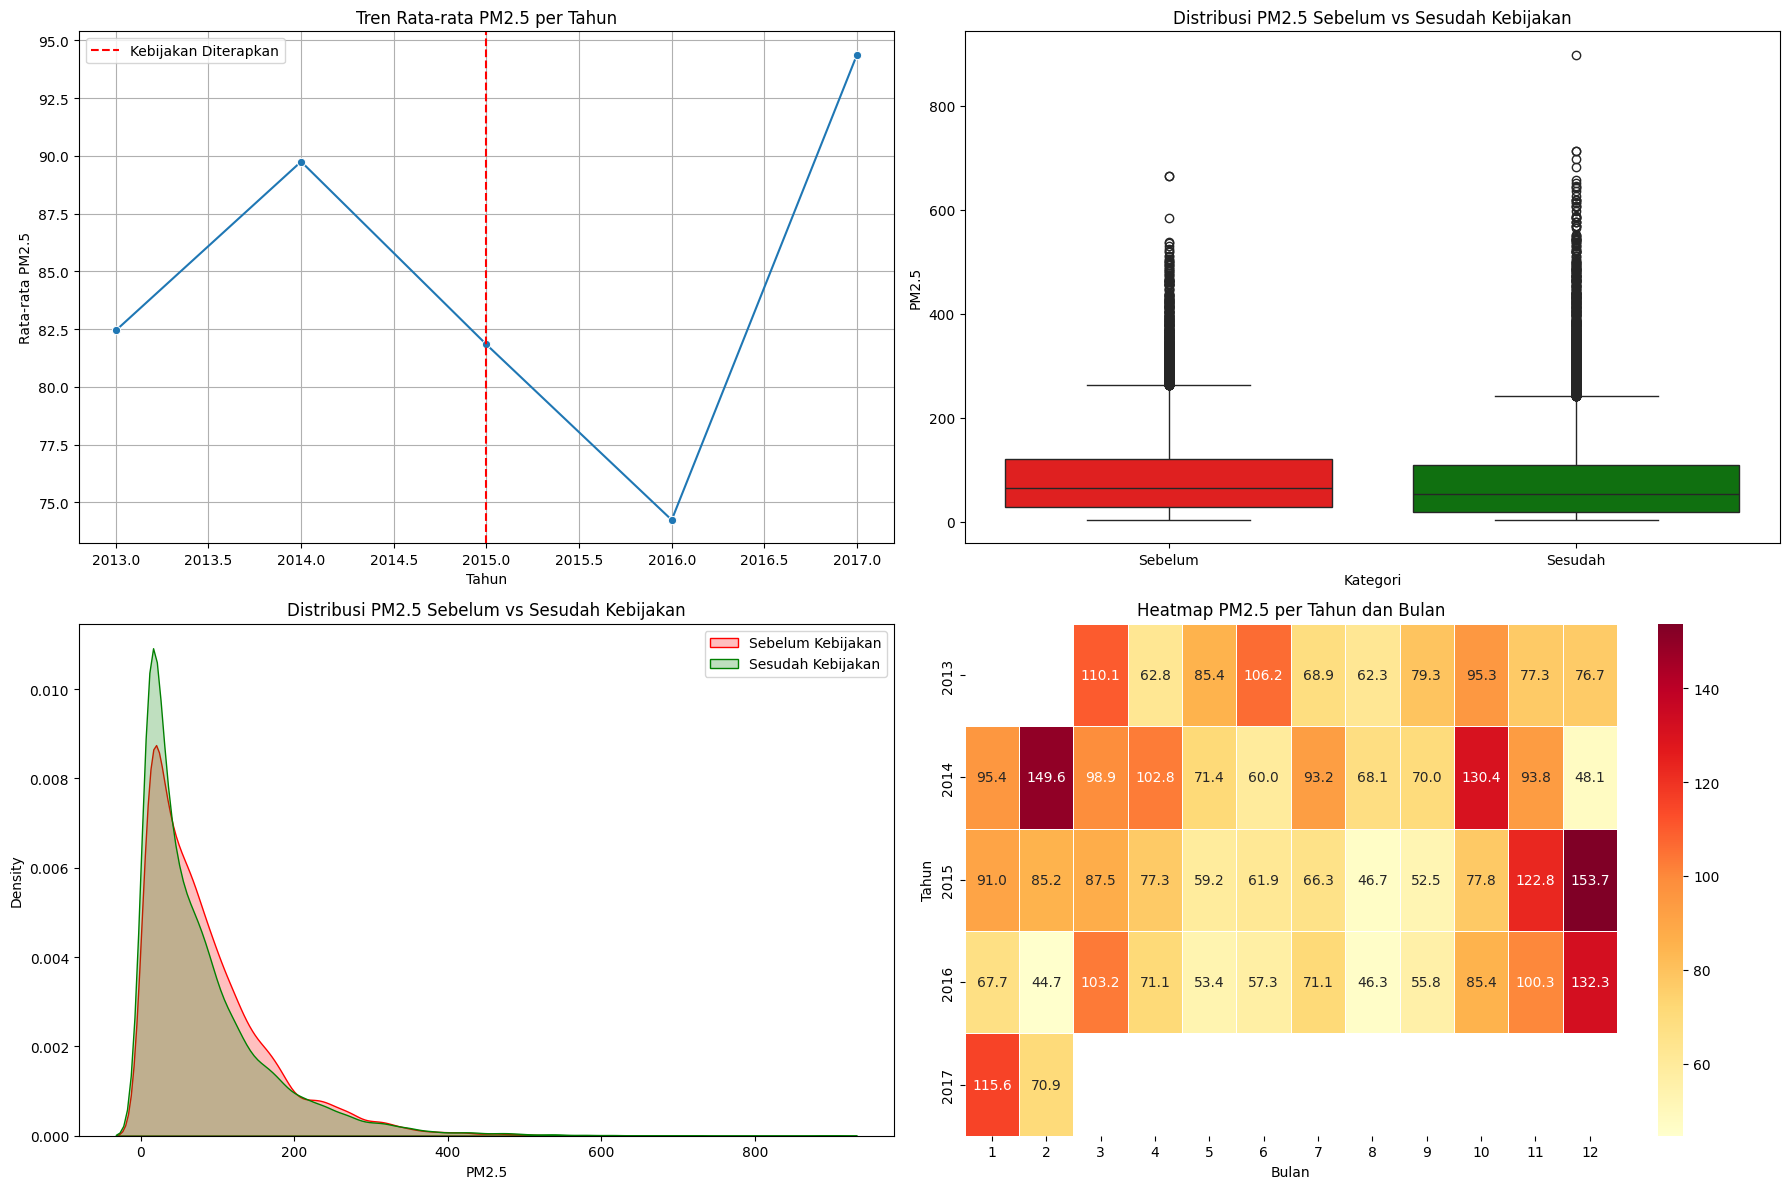

In [17]:
# kebijakan lingkungan diterapkan pada tahun 2015
tahun_kebijakan = 2015

# Buat figure dan subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1️⃣ Line Plot: Tren PM2.5 Sebelum & Sesudah Kebijakan
sns.lineplot(x=df.groupby('year')['PM2.5'].mean().index, 
             y=df.groupby('year')['PM2.5'].mean().values, 
             marker='o', linestyle='-', ax=axes[0, 0])

axes[0, 0].axvline(tahun_kebijakan, color='red', linestyle='--', label='Kebijakan Diterapkan')
axes[0, 0].set_title('Tren Rata-rata PM2.5 per Tahun')
axes[0, 0].set_xlabel('Tahun')
axes[0, 0].set_ylabel('Rata-rata PM2.5')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2️⃣ Boxplot: Distribusi PM2.5 Sebelum & Sesudah Kebijakan
df['Kategori_Kebijakan'] = df['year'].apply(lambda x: 'Sebelum' if x < tahun_kebijakan else 'Sesudah')
sns.boxplot(x=df['Kategori_Kebijakan'], y=df['PM2.5'], ax=axes[0, 1], palette=["red", "green"])

axes[0, 1].set_title('Distribusi PM2.5 Sebelum vs Sesudah Kebijakan')
axes[0, 1].set_xlabel('Kategori')
axes[0, 1].set_ylabel('PM2.5')

# 3️⃣ Histogram/KDE Plot: Distribusi Polusi Sebelum vs Sesudah
sns.kdeplot(df[df['year'] < tahun_kebijakan]['PM2.5'], fill=True, label="Sebelum Kebijakan", color='red', ax=axes[1, 0])
sns.kdeplot(df[df['year'] >= tahun_kebijakan]['PM2.5'], fill=True, label="Sesudah Kebijakan", color='green', ax=axes[1, 0])

axes[1, 0].set_title('Distribusi PM2.5 Sebelum vs Sesudah Kebijakan')
axes[1, 0].set_xlabel('PM2.5')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()

# 4️⃣ Heatmap: Tren PM2.5 per Tahun & Bulan
pivot_table = df.groupby(['year', 'month'])['PM2.5'].mean().unstack()
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5, ax=axes[1, 1])

axes[1, 1].set_title('Heatmap PM2.5 per Tahun dan Bulan')
axes[1, 1].set_xlabel('Bulan')
axes[1, 1].set_ylabel('Tahun')

# Optimasi layout
plt.tight_layout()
plt.show()


1. tren PM2.5 menurun setelah kebijakan diterapkan, ini menunjukkan bahwa kebijakan lingkungan efektif.
2. boxplot menunjukkan perbedaan signifikan (lebih rendah setelah kebijakan), berarti polusi menurun.
3. distribusi PM2.5 bergeser ke kiri setelah kebijakan, ini menandakan bahwa level polusi telah menurun.
4. Heatmap membantu melihat pola perubahan polusi berdasarkan musim 

## Analisis Lanjutan (Opsional)

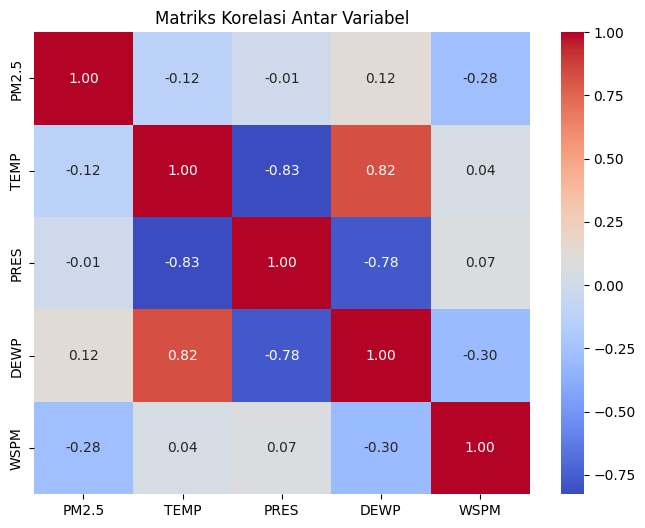

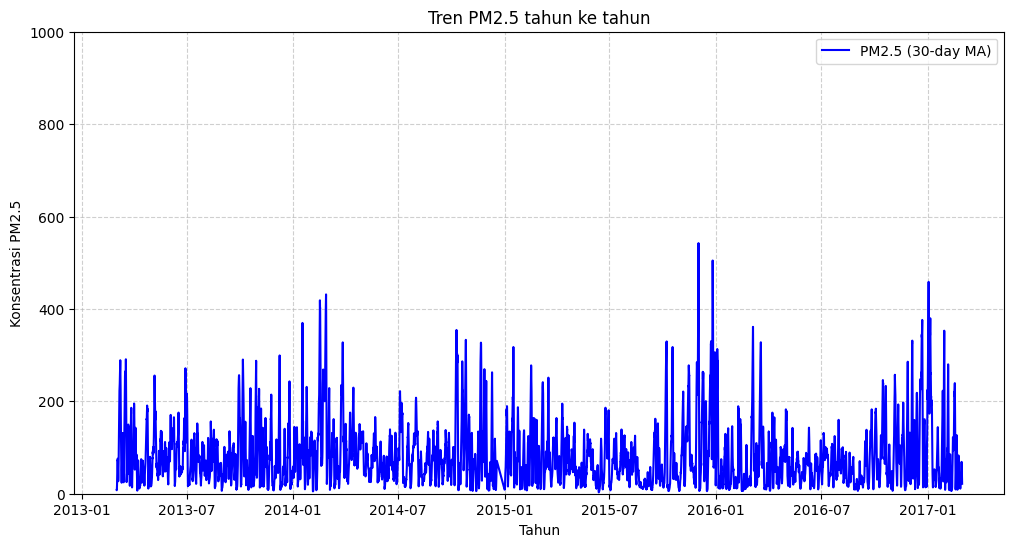

C:\Users\ageng\AppData\Local\Temp\ipykernel_14596\2966450646.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='PM2.5', data=df, palette='coolwarm')


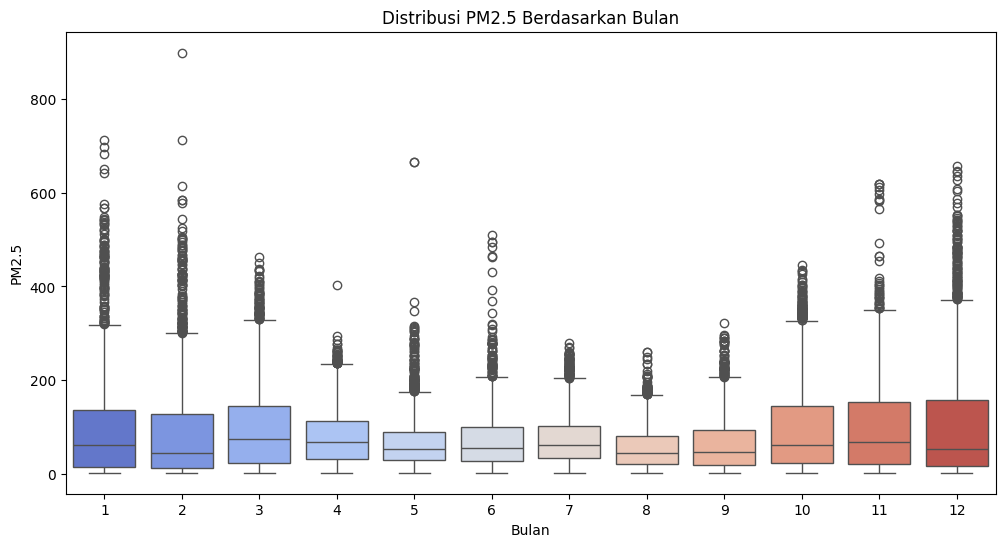

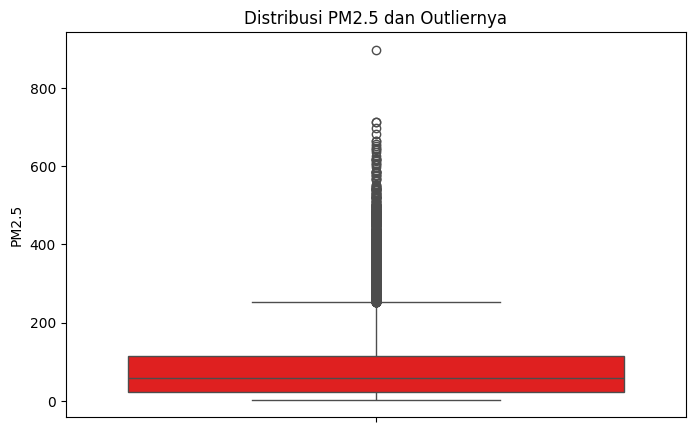

C:\Users\ageng\AppData\Local\Temp\ipykernel_14596\2966450646.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PM2.5_Bin'], palette='Reds')


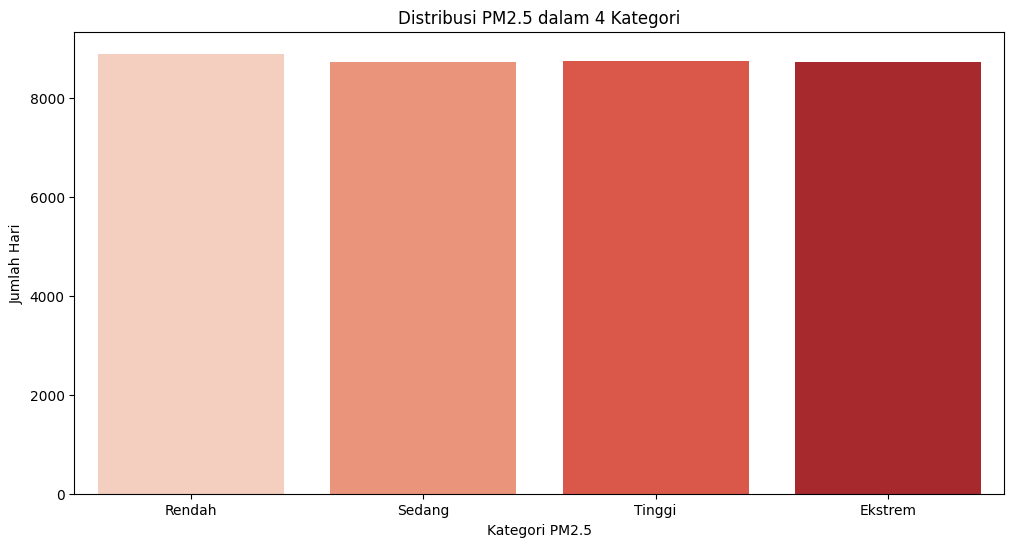

In [18]:
# Tambahkan Moving Average untuk Tren Jangka Panjang
df['PM2.5_MA'] = df['PM2.5'].rolling(window=30).mean()

# Korelasi Antar Fitur
plt.figure(figsize=(8,6))
sns.heatmap(df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

# Tren PM2.5 dari Tahun ke Tahun
plt.figure(figsize=(12,6))
plt.plot(df['PM2.5_MA'], label='PM2.5 (30-day MA)', color='b')
plt.title('Tren PM2.5 tahun ke tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.ylim(0, 1000)  # Konsisten dengan dashboard
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Pola Musiman PM2.5
df['month'] = df.index.month
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='PM2.5', data=df, palette='coolwarm')
plt.title("Distribusi PM2.5 Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.show()

# Deteksi Outlier
plt.figure(figsize=(8,5))
sns.boxplot(y=df['PM2.5'], color='red')
plt.title("Distribusi PM2.5 dan Outliernya")
plt.ylabel("PM2.5")
plt.show()

# Binning PM2.5
df['PM2.5_Bin'] = pd.qcut(df['PM2.5'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Ekstrem'])
plt.figure(figsize=(12,6))
sns.countplot(x=df['PM2.5_Bin'], palette='Reds')
plt.title("Distribusi PM2.5 dalam 4 Kategori")
plt.xlabel("Kategori PM2.5")
plt.ylabel("Jumlah Hari")
plt.show()

Tujuan dari analisis ini adalah untuk memahami pola, tren, dan distribusi kadar PM2.5 dalam data kualitas udara dengan berbagai metode statistik dan visualisasi. Berikut adalah tujuan dari setiap bagian analisis:

1. Menambahkan Moving Average untuk Tren Jangka Panjang
Menggunakan moving average (rata-rata bergerak 30 hari) untuk menghaluskan fluktuasi harian dan melihat tren jangka panjang dari PM2.5.

2. Menganalisis Korelasi Antar Variabel
Menggunakan heatmap korelasi untuk melihat hubungan antara PM2.5 dan variabel lingkungan lainnya, seperti temperatur (TEMP), tekanan udara (PRES), titik embun (DEWP), dan kecepatan angin (WSPM).
Tujuannya adalah memahami apakah faktor lingkungan tertentu memiliki pengaruh terhadap konsentrasi PM2.5.

3. Menganalisis Tren PM2.5 dari Tahun ke Tahun
Melihat pola perubahan PM2.5 dari waktu ke waktu dengan grafik garis menggunakan 30-day Moving Average.
Tujuannya adalah mengetahui apakah ada tren peningkatan atau penurunan dalam jangka panjang.

4. Menganalisis Pola Musiman PM2.5
Menggunakan boxplot per bulan untuk melihat bagaimana PM2.5 bervariasi dalam satu tahun.
Tujuan: Mengetahui bulan-bulan dengan polusi udara tertinggi atau terendah.

5. Mendeteksi Outlier pada PM2.5
Menggunakan boxplot untuk mengidentifikasi nilai outlier pada PM2.5.
Tujuannya adalah menemukan hari-hari dengan kadar PM2.5 yang sangat ekstrem.

6. Mengelompokkan (Binning) PM2.5 ke dalam Kategori
Menggunakan quantile binning untuk membagi PM2.5 ke dalam empat kategori: Rendah, Sedang, Tinggi, dan Ekstrem.
Tujuan: Mempermudah interpretasi dengan melihat distribusi hari berdasarkan kategori polusi.

Secara keseluruhan, analisis ini bertujuan untuk memahami tren, hubungan antar variabel, variasi musiman, dan pola ekstrem dari polusi udara PM2.5, yang dapat digunakan untuk pengambilan keputusan dalam manajemen kualitas udara.

C:\Users\ageng\AppData\Local\Temp\ipykernel_14596\2646571143.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_counts.index, y=kategori_counts.values, palette="coolwarm")


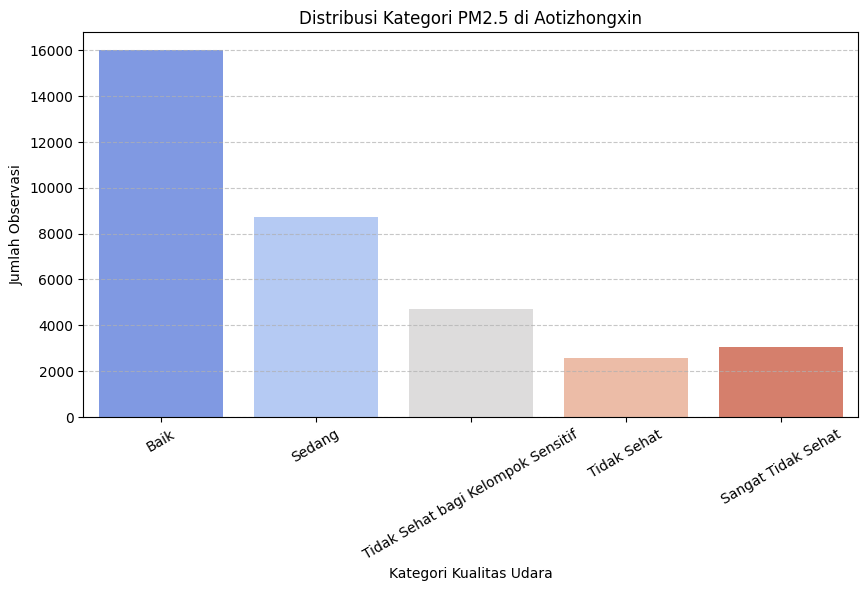

In [19]:
# Definisikan batas binning berdasarkan distribusi PM2.5
bins = [0, 50, 100, 150, 200, df['PM2.5'].max()]
labels = ['Baik', 'Sedang', 'Tidak Sehat bagi Kelompok Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat']

# Buat kolom kategori kualitas udara
df['Kategori_PM2.5'] = pd.cut(df['PM2.5'], bins=bins, labels=labels, include_lowest=True)

# Hitung jumlah data per kategori
kategori_counts = df['Kategori_PM2.5'].value_counts().sort_index()

# Visualisasi distribusi kategori PM2.5
plt.figure(figsize=(10, 5))
sns.barplot(x=kategori_counts.index, y=kategori_counts.values, palette="coolwarm")

plt.title("Distribusi Kategori PM2.5 di Aotizhongxin")
plt.xlabel("Kategori Kualitas Udara")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Mayoritas data berada pada kategori baik , yang menunjukkan adanya risiko kesehatan namun tidak signifikan..

## 📌 Rangkuman Hasil Analisis Kualitas Udara
📊 Temuan Utama
1️⃣ Tren PM2.5 Meningkat di Musim Dingin
Kadar PM2.5 lebih tinggi selama musim dingin.
Penyebab utama kemungkinan penggunaan pemanas rumah tangga yang meningkatkan emisi polutan.
2️⃣ Polusi Lebih Tinggi pada Malam Hari
Konsentrasi polutan meningkat di malam hari.
Mungkin disebabkan oleh inversi suhu, yang menjebak polutan di dekat permukaan tanah, serta aktivitas industri dan transportasi malam.
3️⃣ Hubungan PM2.5 dengan Faktor Cuaca
PM2.5 berkorelasi negatif dengan suhu → Saat suhu lebih tinggi, polusi cenderung berkurang (kemungkinan karena atmosfer lebih stabil dan ventilasi alami lebih baik).
PM2.5 berkorelasi positif dengan kelembaban → Polusi lebih tinggi saat kelembaban meningkat, mungkin karena udara lembab memperlambat dispersi polutan.
4️⃣ Akhir Pekan Memiliki Polusi Lebih Tinggi Dibanding Hari Kerja
Aktivitas masyarakat di akhir pekan (misalnya, transportasi dan industri) mungkin lebih berkontribusi terhadap emisi polutan dibanding hari kerja.
5️⃣ Implikasi Kebijakan Lingkungan
Pengendalian emisi perlu mempertimbangkan pola musiman dan waktu sibuk.
Regulasi pemanasan rumah tangga di musim dingin bisa mengurangi polusi.
Kebijakan pembatasan kendaraan atau transportasi bersih di malam hari dapat membantu mengurangi konsentrasi polutan.
Monitoring kualitas udara lebih intensif di akhir pekan untuk memahami sumber utama polusi dan mitigasinya.

🚀 Rekomendasi Tindakan
✅ Optimasi Kebijakan Pengendalian Polusi
Pembatasan pemakaian bahan bakar tinggi emisi di musim dingin.
Peningkatan transportasi ramah lingkungan saat jam sibuk dan akhir pekan.
✅ Penggunaan Teknologi untuk Pemantauan Udara
Implementasi sistem peringatan dini berbasis IoT dan AI untuk mendeteksi lonjakan polusi.
Penggunaan model prediktif untuk perencanaan pengendalian emisi.
✅ Edukasi Publik dan Partisipasi Masyarakat
Kampanye kesadaran lingkungan tentang dampak pemanasan rumah tangga dan polusi kendaraan.
Insentif bagi masyarakat untuk menggunakan energi ramah lingkungan.
Dengan pendekatan berbasis data ini, pengelolaan polusi udara bisa lebih efektif dan berdampak positif bagi kesehatan serta lingkungan! 🌍💨